# Lead Scoring Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<div class="alert alert-block alert-info">
    <b>Important points to note:</b><br>
<ol><li>Data for this analysis is sourced from the provided link on upgrad </li>
  <ol>
    </div>

<div class="alert alert-block alert-warning">
    <b>Details of this Python Notebook</b><br/>
Author: Vipul Suri and Adishree Garg<br>
File: Leads-Scoring-Assignment.ipynb<br>
Summary: This is the Python code for Lead Scoring<br>
The code and the csv files are required to be in the same directory for successful execution of code<br> 
</div>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets load the csv into a dataframe
df = pd.read_csv('leads.csv')

In [3]:
#view the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#describe the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#lets look at the columns
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
#let look at the shape of the dataframe
df.shape

(9240, 37)

## Data Preparation - Treating null values

In [8]:
#lets create a dataframe for null value count and percentage
df_null_metrics = pd.DataFrame(df.isnull().sum(),columns=['total'])
percentage_nulls = pd.DataFrame(round(((df.isnull().sum()/df.shape[0])*100),2), columns=['percentage'])
df_null_metrics = pd.concat([df_null_metrics,percentage_nulls],axis = 1)
#lets review the null value dataframe we created above
df_null_metrics.sort_values(by='total', ascending=False, inplace=True)
df_null_metrics

,total,percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


#### As we can see from above that there are a few columns with >45% of null values, therefore we will drop these columns

- Asymmetrique Activity Index                     
- Asymmetrique Profile Index                       
- Asymmetrique Activity Score                      
- Asymmetrique Profile Score
- Lead Quality

In [9]:
df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'], axis=1,inplace=True)

In [10]:
df.shape

(9240, 32)

In [11]:
#lets also drop the duplicate rows based on the 
df.drop_duplicates('Prospect ID',inplace=True)

In [12]:
df.shape

(9240, 32)

In [13]:
#lets drop any duplicate rows in the dataframe
df.drop_duplicates('Lead Number',inplace=True)

In [14]:
df.shape

(9240, 32)

In [15]:
#the columns Prospect Id and lead number are not going to help us in creating leads so lets drop these
df.drop(['Prospect ID'],axis=1,inplace=True)


#### Lets review the categorical columns now to understand if some columns have single values only or if there is an opportunity for us to create dummy variables

In [16]:
#retreive all the columns with type object
columns_obj = df.select_dtypes(include=object).columns

In [17]:
#all object columns are listed below
columns_obj

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
#lets print all the columns along with the unique values in the column in our dataset
for x in columns_obj:
    print('\n'+x)
    print(df[x].unique())


Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Do Not Email
['No' 'Yes']

Do Not Call
['No' 'Yes']

Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']

Country
[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi 

#### Looking at the above dataset closely we can see that some of fields have non unique values and therefore will not be helpful in building a model.
#### We will drop the following fields:
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [19]:
#lets drop the columns where there is only one unique value in the column
df.loc[:,df.nunique()!=1]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,No,No,No,No,No,Interested in other courses,Select,Select,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,No,No,No,No,No,Ringing,Select,Select,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,No,No,No,No,No,Ringing,Select,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,No,No,No,No,No,Will revert after reading the email,Select,Mumbai,No,Modified
5,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,...,No,No,No,No,No,NaN,NaN,NaN,No,Modified
6,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,...,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,No,Modified
7,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,...,No,No,No,No,No,NaN,NaN,NaN,No,Modified
8,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,...,No,No,No,No,No,NaN,NaN,Thane & Outskirts,Yes,Email Opened
9,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,...,No,No,No,No,No,NaN,NaN,Mumbai,No,Email Opened


In [20]:
df.shape

(9240, 31)

In [21]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [22]:
#lets create a dataframe for null value count and percentage
df_types = pd.DataFrame(df.dtypes, columns=['type'])
df_null_metrics = pd.DataFrame(df.isnull().sum(),columns=['total'])
percentage_nulls = pd.DataFrame(round(((df.isnull().sum()/df.shape[0])*100),2), columns=['percentage'])
df_null_metrics = pd.concat([df_null_metrics,percentage_nulls,df_types],axis = 1)

#lets review the null value dataframe we created above
df_null_metrics.sort_values(by='total', ascending=False, inplace=True)
df_null_metrics

,total,percentage,type
Tags,3353,36.29,object
Lead Profile,2709,29.32,object
What matters most to you in choosing a course,2709,29.32,object
What is your current occupation,2690,29.11,object
Country,2461,26.63,object
How did you hear about X Education,2207,23.89,object
Specialization,1438,15.56,object
City,1420,15.37,object
TotalVisits,137,1.48,float64
Page Views Per Visit,137,1.48,float64


### Lets start treating the null values one by one
### One very important point to note here is that there are many columns with value as 'select' which is as good as null or preferably 'Unknown'. We decided to replace null and select values with 'unknown' and then dropping this post dummy variable creation.

In [23]:
df.shape

(9240, 31)

In [24]:
#lets start handling the null values
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [25]:
#tag variable is an interesting variable and therefore we will mark all null values of this field as 'unknown'
df['Tags'].fillna(value='unknown', inplace=True)

In [26]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'unknown', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [27]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [28]:
#looks like the column Lead Profile is also not useful for us as around 45% value are select which is like null, 
#lets drop this columns
df.drop(['Lead Profile'], axis=1,inplace=True)

In [29]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
#not a lot of variation in the above column as well, let drop this one as well
df.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [31]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
df['What is your current occupation'].fillna(value='unknown',inplace=True)

In [33]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [34]:
# lets drop this column as well
df['How did you hear about X Education'].fillna(value='unknown', inplace=True)
df['How did you hear about X Education'].replace(to_replace='select', value='unknown', inplace=True)

In [35]:
#lets review the null values again
#lets create a dataframe for null value count and percentage
df_types = pd.DataFrame(df.dtypes, columns=['type'])
df_null_metrics = pd.DataFrame(df.isnull().sum(),columns=['total'])
percentage_nulls = pd.DataFrame(round(((df.isnull().sum()/df.shape[0])*100),2), columns=['percentage'])
df_null_metrics = pd.concat([df_null_metrics,percentage_nulls,df_types],axis = 1)

#lets review the null value dataframe we created above
df_null_metrics.sort_values(by='total', ascending=False, inplace=True)
df_null_metrics

,total,percentage,type
Country,2461,26.63,object
Specialization,1438,15.56,object
City,1420,15.37,object
Page Views Per Visit,137,1.48,float64
TotalVisits,137,1.48,float64
Last Activity,103,1.11,object
Lead Source,36,0.39,object
Through Recommendations,0,0.00,object
Receive More Updates About Our Courses,0,0.00,object
Tags,0,0.00,object


In [36]:
#lets review the column for unique value counts
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Kuwait                     4
Germany                    4
Canada                     4
South Africa               4
Sweden                     3
Bangladesh                 2
Ghana                      2
Uganda                     2
Belgium                    2
Asia/Pacific Region        2
Italy                      2
Netherlands                2
China                      2
Philippines                2
Switzerland                1
Russia                     1
Vietnam                    1
Denmark                    1
Indonesia                  1
Malaysia                   1
Kenya         

In [37]:
#lets drop country column as well
df.drop(['Country'],axis=1,inplace=True)

In [38]:
#lets review the column for unique value counts
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [39]:
df['Specialization'].isnull().sum()

1438

In [40]:
df['Specialization'].fillna(value='unknown', inplace=True)

In [41]:
#lets review the column for unique value counts
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [42]:
#replace the 'select' and null values with unknown
df['City'].replace(to_replace='Select', value='unknown', inplace=True)
df['City'].fillna(value='unknown',inplace=True)
df['City'].value_counts()

unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
#lets review the null values again
#lets create a dataframe for null value count and percentage
df_types = pd.DataFrame(df.dtypes, columns=['type'])
df_null_metrics = pd.DataFrame(df.isnull().sum(),columns=['total'])
percentage_nulls = pd.DataFrame(round(((df.isnull().sum()/df.shape[0])*100),2), columns=['percentage'])
df_null_metrics = pd.concat([df_null_metrics,percentage_nulls,df_types],axis = 1)

#lets review the null value dataframe we created above
df_null_metrics.sort_values(by='total', ascending=False, inplace=True)
df_null_metrics

,total,percentage,type
TotalVisits,137,1.48,float64
Page Views Per Visit,137,1.48,float64
Last Activity,103,1.11,object
Lead Source,36,0.39,object
Lead Number,0,0.00,int64
X Education Forums,0,0.00,object
A free copy of Mastering The Interview,0,0.00,object
I agree to pay the amount through cheque,0,0.00,object
City,0,0.00,object
Get updates on DM Content,0,0.00,object


#### now we have quite a managable no. of null values in the dataset and therefore we will not impute the numerical variables rather just drop the rows with null columns

In [44]:
#lets drop the rows where there are null values
df.dropna(inplace=True)

In [45]:
df.shape

(9074, 28)

In [46]:
#lets review the null values again
#lets create a dataframe for null value count and percentage
df_types = pd.DataFrame(df.dtypes, columns=['type'])
df_null_metrics = pd.DataFrame(df.isnull().sum(),columns=['total'])
percentage_nulls = pd.DataFrame(round(((df.isnull().sum()/df.shape[0])*100),2), columns=['percentage'])
df_null_metrics = pd.concat([df_null_metrics,percentage_nulls,df_types],axis = 1)

#lets review the null value dataframe we created above
df_null_metrics.sort_values(by='total', ascending=False, inplace=True)
df_null_metrics

,total,percentage,type
Lead Number,0,0.0,int64
Lead Origin,0,0.0,object
A free copy of Mastering The Interview,0,0.0,object
I agree to pay the amount through cheque,0,0.0,object
City,0,0.0,object
Get updates on DM Content,0,0.0,object
Update me on Supply Chain Content,0,0.0,object
Tags,0,0.0,object
Receive More Updates About Our Courses,0,0.0,object
Through Recommendations,0,0.0,object


In [47]:
obj_cols = df.select_dtypes(include=object).columns

In [48]:
obj_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
#lets do a quick check on value count again
for x in obj_cols:
    print('**')
    print(x)
    print(df[x].value_counts())

**
Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
**
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
testone                 1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
**
Do Not Email
No     8358
Yes     716
Name: Do Not Email, dtype: int64
**
Do Not Call
No     9072
Yes       2
Name: Do Not Call, dtype: int64
**
Last Activity
Email Opened                    3432
SMS Sent                        27

### The below mentioned columns are not useful as majority >90% of the rows with the same value, lets just drop these columns
'Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content'
'Get updates on DM Content','I agree to pay the amount through cheque'

In [50]:
df.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace=True)

In [51]:
df.shape

(9074, 15)

In [52]:
num_cols = df.select_dtypes(exclude=object).columns
num_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

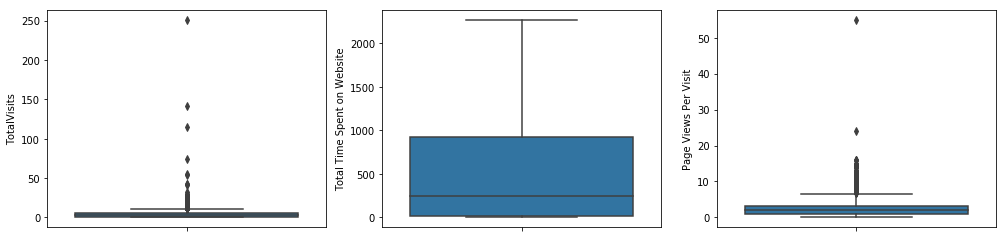

In [53]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.boxplot(y=df['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(y=df['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

### Now Lets create dummy variables

In [54]:
obj_cols = df.select_dtypes(include=object).columns

In [55]:
obj_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [56]:
cols1 = ['Lead Origin', 'Lead Source', 'Last Activity', 'A free copy of Mastering The Interview',
       'Last Notable Activity','What is your current occupation']
for x in cols1:
    dummy_df = pd.get_dummies(df[x], prefix=x,drop_first=True)
    df = pd.concat([df,dummy_df],axis=1)

In [57]:
cols2 = 'Specialization','Tags','City','How did you hear about X Education'
for x in cols2:
    dummy_df = pd.get_dummies(df[x], prefix=x)
    df = pd.concat([df,dummy_df],axis=1)

In [58]:
#lets also drop the columns where we added unknown values to the field like Specialization, City
df.drop(['What is your current occupation_unknown','City_unknown','Tags_unknown','Specialization_unknown','How did you hear about X Education_unknown'],axis=1,inplace=True)

In [59]:
df.drop(obj_cols,axis=1,inplace=True)

In [60]:
df.shape

(9074, 126)

In [61]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151,0.538351,0.064029,0.003306,0.280251,0.003416,...,0.007714,0.002865,0.016751,0.089046,0.020498,0.002535,0.538462,0.007274,0.034164,0.038241
std,23348.029512,0.485053,4.858802,545.256560,2.160871,0.498554,0.244818,0.057407,0.449147,0.058353,...,0.087497,0.053455,0.128345,0.284825,0.141705,0.050285,0.498546,0.084979,0.181659,0.191788
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# Ensuring there are no categorical columns left in the dataframe
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

### we now have quite respectful dataset and we can now work on it.

In [63]:
original_leads_df = df.copy()

In [64]:
df.shape

(9074, 126)

In [65]:
#conversion rate in the dataset
(sum(df['Converted'])/df.shape[0])*100

37.85541106458012

# Splitting the data into X_train, Y_train, X_test, Y_test

In [66]:
# Import the required library

from sklearn.model_selection import train_test_split

In [67]:
# Put all the feature variables in X

X = df.drop(['Converted','Lead Number'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
# Put the target variable in y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [71]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
# Looking at the correlation table
new_df = df.drop('Lead Number',axis=1)
new_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,...,0.014287,0.013422,-0.002727,0.029620,0.007358,-0.016750,0.208466,0.005389,0.032082,0.023271
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,0.095571,-0.036983,0.106848,...,0.051094,0.012367,0.025572,0.113691,0.045811,0.006095,-0.062433,0.026134,0.045157,0.060884
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,0.140793,-0.050248,0.215390,...,0.043139,0.005880,0.055762,0.107977,0.050817,0.010804,-0.011504,0.019699,0.067024,0.076204
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,0.133118,-0.053735,0.204870,...,0.043802,0.021589,0.057008,0.164386,0.087453,0.017656,-0.091472,0.036649,0.088845,0.096161
Lead Origin_Landing Page Submission,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,0.523695,-0.059438,0.078455,...,0.079123,0.049640,0.101921,0.247608,0.116800,0.046681,-0.171337,0.071460,0.146171,0.148919
Lead Origin_Lead Add Form,0.300775,-0.169742,-0.188526,-0.268415,-0.282445,1.000000,-0.015064,-0.163208,-0.015314,-0.176836,...,-0.023062,-0.014021,-0.034139,-0.077032,-0.037837,-0.013185,0.235829,-0.022388,-0.041756,-0.049807
Lead Origin_Lead Import,-0.009328,-0.037808,-0.050742,-0.056068,-0.062195,-0.015064,1.000000,-0.035939,0.983684,-0.039153,...,-0.005078,-0.003087,-0.007517,-0.018007,-0.008332,-0.002903,0.041769,-0.004930,-0.010832,-0.011485
Lead Source_Direct Traffic,-0.073186,0.095571,0.140793,0.133118,0.523695,-0.163208,-0.035939,1.000000,-0.036535,-0.424196,...,-0.029778,-0.019678,-0.047031,-0.098599,-0.060830,-0.026576,0.146037,-0.036086,-0.032255,-0.063012
Lead Source_Facebook,-0.010651,-0.036983,-0.050248,-0.053735,-0.059438,-0.015314,0.983684,-0.036535,1.000000,-0.039802,...,-0.005162,-0.003139,-0.007642,-0.018306,-0.008470,-0.002951,0.042841,-0.005012,-0.011012,-0.011675
Lead Source_Google,0.029960,0.106848,0.215390,0.204870,0.078455,-0.176836,-0.039153,-0.424196,-0.039802,1.000000,...,0.083646,0.065551,0.145829,0.316766,0.175998,0.060012,-0.325368,0.103598,0.168355,0.211751


In [73]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
# Import RFE and select 25 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [75]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 48),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', False, 41),
 ('Lead Origin_Lead Import', False, 66),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Live Chat', False, 104),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', False, 65),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 103),
 ('Lead Source_Press_Release', False, 82),
 ('Lead Source_Reference', False, 49),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Social Media', False, 89),
 ('Lead Source_WeLearn', False, 105),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 90),
 ('Lead Source_blog', False, 54),
 ('Lead Source_google', False, 40),
 ('Lead Source_testone', False, 88),
 ('Lead Source_welearnblog_Home', False

In [76]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [77]:
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [78]:
# Select only the columns selected by RFE
X_train = X_train[col]

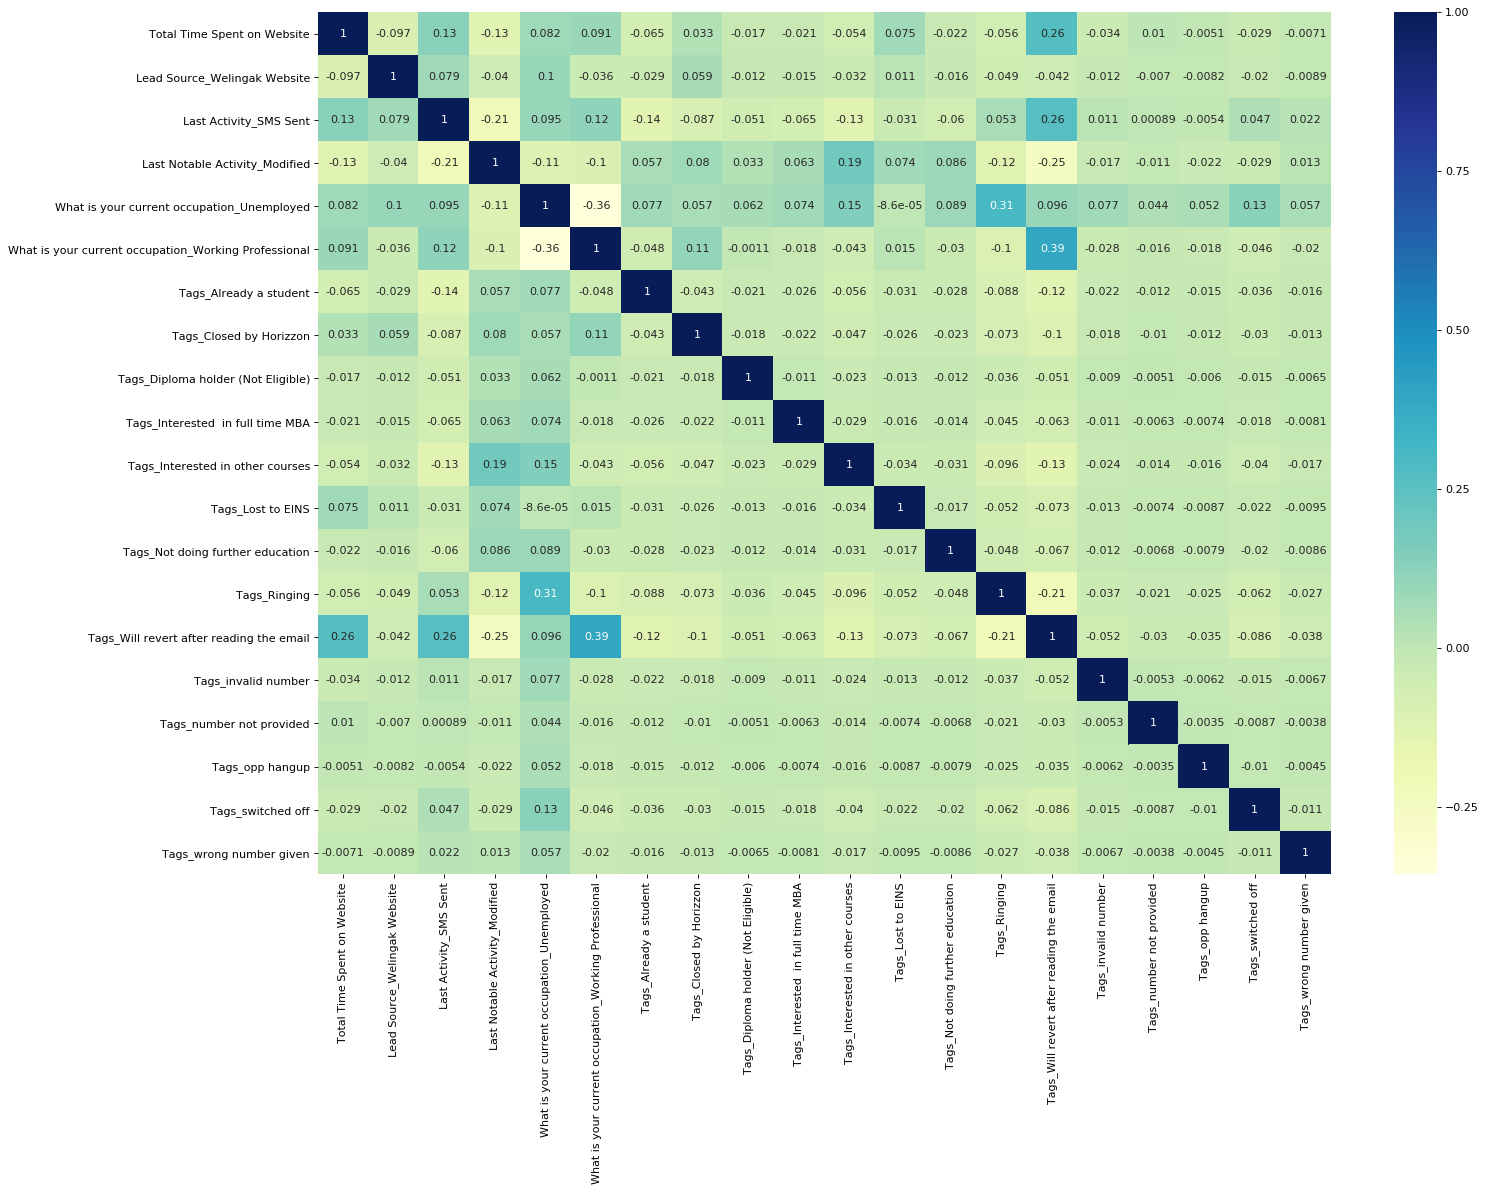

In [79]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [80]:
# Import statsmodels

import statsmodels.api as sm

In [81]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1101.4
Date:                Wed, 08 Jan 2020   Deviance:                       2202.9
Time:                        10:58:41   Pearson chi2:                 9.14e+03
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7853      0.118    -23.525      0.000      -3.017      -2.553
Total Time Spent on Website                              3.5526      0.231     15.394      0.000       3.100       4.005
Lead Source_Welingak Website                             3.8424      0.739      5.197      0.000       2.393       5.291
Last Activity_SMS Sent                                   2.0093      0.124     16.150      0.000       1.765       2.253
Last Notable Activity_Modified                          -1.7888      0.137    -13.081      0.000      -2.057      -1.521
What is your current occupation_Unemployed               1.9257      0.128     15.079      0.000       1.675       2.176
What is your current occupation_Working Professional     2.1768      0.399      5.458      0.000       1.395       2.959
Tags_Already a student                                  -4.5261      0.726     -6.233      0.000      -5.949      -3.103
Tags_Closed by Horizzon                                  6.2403      0.737      8.470      0.000       4.796       7.684
Tags_Diploma holder (Not Eligible)                      -4.0158      1.097     -3.660      0.000      -6.167      -1.865
Tags_Interested  in full time MBA                       -3.0189      0.744     -4.056      0.000      -4.478      -1.560
Tags_Interested in other courses                        -2.7661      0.341     -8.104      0.000      -3.435      -2.097
Tags_Lost to EINS                                        5.7939      0.746      7.768      0.000       4.332       7.256
Tags_Not doing further education                        -4.0298      1.024     -3.935      0.000      -6.037      -2.023
Tags_Ringing                                            -4.9227      0.270    -18.207      0.000      -5.453      -4.393
Tags_Will revert after reading the email                 3.7843      0.212     17.867      0.000       3.369       4.199
Tags_invalid number                                    -26.1446   2.56e+04     -0.001      0.999   -5.02e+04    5.02e+04
Tags_number not provided                               -26.7811   4.33e+04     -0.001      1.000    -8.5e+04    8.49e+04
Tags_opp hangup                                         -3.0425      0.768     -3.964      0.000      -4.547      -1.538
Tags_switched off                                       -4.8940      0.539     -9.087      0.000      -5.949      -3.838
Tags_wrong number given                                -26.6125   3.35e+04     -0.001      0.999   -6.57e+04    6.56e+04
========================================================================================================================
"""

In [82]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,5.27
14,Tags_Will revert after reading the email,2.88
13,Tags_Ringing,1.98
5,What is your current occupation_Working Profes...,1.85
0,Total Time Spent on Website,1.79
2,Last Activity_SMS Sent,1.61
10,Tags_Interested in other courses,1.47
3,Last Notable Activity_Modified,1.38
7,Tags_Closed by Horizzon,1.29
6,Tags_Already a student,1.27


In [84]:
#lets drop the field with highest p-value
X_train.drop('Tags_number not provided', axis = 1, inplace = True)

In [85]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1121.0
Date:                Wed, 08 Jan 2020   Deviance:                       2242.0
Time:                        10:58:41   Pearson chi2:                 8.75e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7659      0.117    -23.548      0.000      -2.996      -2.536
Total Time Spent on Website                              3.4958      0.228     15.348      0.000       3.049       3.942
Lead Source_Welingak Website                             3.9243      0.739      5.314      0.000       2.477       5.372
Last Activity_SMS Sent                                   1.9779      0.123     16.141      0.000       1.738       2.218
Last Notable Activity_Modified                          -1.7615      0.136    -12.991      0.000      -2.027      -1.496
What is your current occupation_Unemployed               1.8265      0.126     14.537      0.000       1.580       2.073
What is your current occupation_Working Professional     2.1155      0.399      5.307      0.000       1.334       2.897
Tags_Already a student                                  -4.4294      0.725     -6.107      0.000      -5.851      -3.008
Tags_Closed by Horizzon                                  6.2793      0.735      8.538      0.000       4.838       7.721
Tags_Diploma holder (Not Eligible)                      -3.9094      1.093     -3.578      0.000      -6.051      -1.768
Tags_Interested  in full time MBA                       -2.9291      0.743     -3.942      0.000      -4.386      -1.473
Tags_Interested in other courses                        -2.6732      0.340     -7.864      0.000      -3.340      -2.007
Tags_Lost to EINS                                        5.8011      0.744      7.797      0.000       4.343       7.259
Tags_Not doing further education                        -3.9325      1.023     -3.843      0.000      -5.938      -1.927
Tags_Ringing                                            -4.7960      0.268    -17.908      0.000      -5.321      -4.271
Tags_Will revert after reading the email                 3.8410      0.211     18.224      0.000       3.428       4.254
Tags_invalid number                                    -25.0305   1.56e+04     -0.002      0.999   -3.05e+04    3.05e+04
Tags_opp hangup                                         -2.9342      0.767     -3.828      0.000      -4.437      -1.432
Tags_switched off                                       -4.7690      0.537     -8.881      0.000      -5.821      -3.717
Tags_wrong number given                                -25.4878   2.04e+04     -0.001      0.999   -3.99e+04    3.99e+04
========================================================================================================================
"""

In [86]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,5.17
14,Tags_Will revert after reading the email,2.84
13,Tags_Ringing,1.96
5,What is your current occupation_Working Profes...,1.84
0,Total Time Spent on Website,1.79
2,Last Activity_SMS Sent,1.61
10,Tags_Interested in other courses,1.46
3,Last Notable Activity_Modified,1.38
7,Tags_Closed by Horizzon,1.29
6,Tags_Already a student,1.26


In [87]:
X_train.drop('Tags_wrong number given', axis = 1, inplace = True)

In [88]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1150.3
Date:                Wed, 08 Jan 2020   Deviance:                       2300.6
Time:                        10:58:42   Pearson chi2:                 8.19e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7236      0.116    -23.533      0.000      -2.950      -2.497
Total Time Spent on Website                              3.4272      0.224     15.316      0.000       2.989       3.866
Lead Source_Welingak Website                             4.0380      0.737      5.476      0.000       2.593       5.483
Last Activity_SMS Sent                                   1.8979      0.120     15.873      0.000       1.664       2.132
Last Notable Activity_Modified                          -1.7367      0.134    -12.981      0.000      -1.999      -1.475
What is your current occupation_Unemployed               1.6879      0.123     13.732      0.000       1.447       1.929
What is your current occupation_Working Professional     2.0290      0.398      5.095      0.000       1.249       2.810
Tags_Already a student                                  -4.3117      0.724     -5.951      0.000      -5.732      -2.892
Tags_Closed by Horizzon                                  6.3327      0.734      8.629      0.000       4.894       7.771
Tags_Diploma holder (Not Eligible)                      -3.7671      1.085     -3.472      0.001      -5.894      -1.641
Tags_Interested  in full time MBA                       -2.8153      0.742     -3.795      0.000      -4.269      -1.361
Tags_Interested in other courses                        -2.5491      0.338     -7.542      0.000      -3.212      -1.887
Tags_Lost to EINS                                        5.8108      0.742      7.836      0.000       4.357       7.264
Tags_Not doing further education                        -3.8024      1.022     -3.719      0.000      -5.806      -1.799
Tags_Ringing                                            -4.6092      0.264    -17.451      0.000      -5.127      -4.091
Tags_Will revert after reading the email                 3.9158      0.209     18.699      0.000       3.505       4.326
Tags_invalid number                                    -24.8620   1.56e+04     -0.002      0.999   -3.06e+04    3.06e+04
Tags_opp hangup                                         -2.7825      0.765     -3.638      0.000      -4.281      -1.284
Tags_switched off                                       -4.5807      0.535     -8.566      0.000      -5.629      -3.533
========================================================================================================================
"""

In [89]:
X_train.drop('Tags_invalid number', axis = 1, inplace = True)

In [90]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.9
Date:                Wed, 08 Jan 2020   Deviance:                       2379.7
Time:                        10:58:42   Pearson chi2:                 7.65e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7265      0.115    -23.696      0.000      -2.952      -2.501
Total Time Spent on Website                              3.4869      0.220     15.831      0.000       3.055       3.919
Lead Source_Welingak Website                             4.2458      0.736      5.771      0.000       2.804       5.688
Last Activity_SMS Sent                                   1.8174      0.116     15.678      0.000       1.590       2.045
Last Notable Activity_Modified                          -1.6799      0.132    -12.717      0.000      -1.939      -1.421
What is your current occupation_Unemployed               1.4909      0.120     12.464      0.000       1.256       1.725
What is your current occupation_Working Professional     1.9122      0.399      4.787      0.000       1.129       2.695
Tags_Already a student                                  -4.1511      0.724     -5.733      0.000      -5.570      -2.732
Tags_Closed by Horizzon                                  6.4404      0.732      8.795      0.000       5.005       7.876
Tags_Diploma holder (Not Eligible)                      -3.5880      1.080     -3.322      0.001      -5.705      -1.471
Tags_Interested  in full time MBA                       -2.6557      0.741     -3.582      0.000      -4.109      -1.203
Tags_Interested in other courses                        -2.3783      0.337     -7.067      0.000      -3.038      -1.719
Tags_Lost to EINS                                        5.8418      0.739      7.904      0.000       4.393       7.290
Tags_Not doing further education                        -3.6219      1.022     -3.545      0.000      -5.624      -1.620
Tags_Ringing                                            -4.3701      0.261    -16.771      0.000      -4.881      -3.859
Tags_Will revert after reading the email                 4.0482      0.208     19.484      0.000       3.641       4.455
Tags_opp hangup                                         -2.5620      0.763     -3.358      0.001      -4.057      -1.067
Tags_switched off                                       -4.3323      0.533     -8.129      0.000      -5.377      -3.288
========================================================================================================================
"""

In [91]:
X_train.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
3009,0.178347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,0.085355,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4750,0.619946,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7987,0.711590,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [92]:
x_train_sm = sm.add_constant(X_train)
y_train_pred = res.predict(x_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.10864725, 0.3736369 , 0.00420092, 0.77774259, 0.9992723 ,
       0.99791599, 0.0617891 , 0.95100898, 0.99729797, 0.04215753])

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [94]:
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID
0,0,0.108647,3009
1,0,0.373637,1012
2,0,0.004201,9226
3,1,0.777743,4750
4,1,0.999272,7987
5,1,0.997916,1281
6,0,0.061789,2880
7,1,0.951009,4971
8,1,0.997298,7536
9,0,0.042158,1248


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [95]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.108647,3009,0
1,0,0.373637,1012,0
2,0,0.004201,9226,0
3,1,0.777743,4750,1
4,1,0.999272,7987,1


In [96]:
from sklearn import metrics

In [97]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3748  157]
 [ 285 2161]]


In [98]:
# Predicted     not_churn    churn
# Actual
# not_churn        2178        171
# churn            172       1952 

In [99]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9304046606833569


In [100]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Calculate the sensitivity

TP/(TP+FN)

0.883483237939493

In [102]:
# Calculate the specificity

TN/(TN+FP)

0.9597951344430218

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [103]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

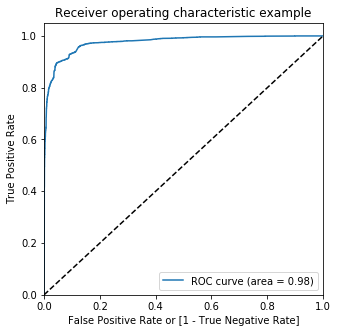

In [105]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [106]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.108647,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.373637,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.004201,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.777743,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.999272,7987,1,1,1,1,1,1,1,1,1,1,1


In [107]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.874350  0.973835  0.812036
0.2   0.2  0.905999  0.958299  0.873239
0.3   0.3  0.914502  0.911693  0.916261
0.4   0.4  0.929932  0.896975  0.950576
0.5   0.5  0.930405  0.883483  0.959795
0.6   0.6  0.925051  0.867130  0.961332
0.7   0.7  0.916234  0.823385  0.974392
0.8   0.8  0.907259  0.783729  0.984635
0.9   0.9  0.894977  0.742845  0.990269


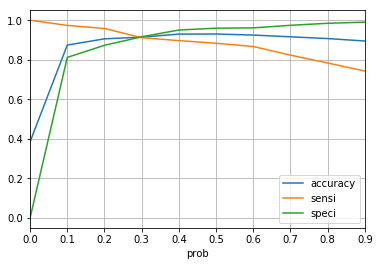

In [108]:
# Let's plot it as well
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid=True)
plt.show()

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.108647,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.373637,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.004201,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.777743,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.999272,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [110]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9145016532829475

In [111]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3578,  327],
       [ 216, 2230]], dtype=int64)

In [112]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Calculate Sensitivity

TP/(TP+FN)

0.9116925592804579

In [114]:
# Calculate Specificity

TN/(TN+FP)

0.9162612035851473

## Precision and Recall

##### Precision
TP / TP + FP

In [115]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.9322691975841243

##### Recall
TP / TP + FN

In [116]:
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.883483237939493

In [117]:
from sklearn.metrics import precision_score, recall_score

In [118]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8721157606570199

In [119]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9116925592804579

### Precision and recall tradeoff

In [120]:
from sklearn.metrics import precision_recall_curve

In [121]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       1
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      1
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

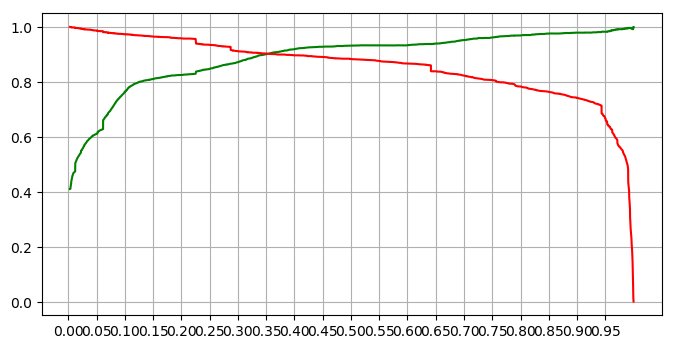

In [123]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(True)
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to .34. However our business requirement here is to have Lead Conversion Rate around 80%.  

#### This is already achieved with our earlier threshold value of 0.30. So we will stick to this value.

### Calculating the F1 score
##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [124]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.9072208228379512

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [125]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [126]:
# Select the columns in X_train for X_test as well
_cols = X_train.columns
X_test = X_test[_cols]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
3271,0.070530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,0.679695,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7936,0.033243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,0.000000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3830,0.073675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[_cols])

In [128]:
# Check X_test_sm

X_test_sm.head()

,const,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
3271,1.0,0.070530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,1.0,0.679695,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7936,1.0,0.033243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,1.0,0.000000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3830,1.0,0.073675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [130]:
y_test_pred[:10]

3271    0.077231
1490    0.996330
7936    0.068460
4216    0.884320
3830    0.078016
1800    0.966203
6507    0.026955
4821    0.010991
4223    0.990339
4714    0.069847
dtype: float64

In [131]:
# Converting y_pred to a dataframe

y_test_pred = pd.DataFrame(y_test_pred)


In [132]:
# Let's see the head

y_test_pred.head()

,0
3271,0.077231
1490,0.996330
7936,0.068460
4216,0.884320
3830,0.078016


In [133]:
# Converting y_test to dataframe

y_test_pred_df = pd.DataFrame(y_test)
y_test_pred_df['LeadID'] = y_test_pred_df.index

In [134]:
# Remove index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_pred_df.reset_index(drop=True, inplace=True)

In [135]:
# Append y_test_df and y_pred_1

y_test_pred_final = pd.concat([y_test_pred_df, y_test_pred],axis=1)

In [136]:
# Check 'y_pred_final'

y_test_pred_final.head()

,Converted,LeadID,0
0,0,3271,0.077231
1,1,1490,0.996330
2,0,7936,0.068460
3,1,4216,0.884320
4,0,3830,0.078016


In [137]:
# Rename the column 

y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [138]:
# Let's see the head of y_pred_final

y_test_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,3271,0.077231
1,1,1490,0.996330
2,0,7936,0.068460
3,1,4216,0.884320
4,0,3830,0.078016


In [139]:
# Make predictions on the test set using 0.46 as the cutoff

y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [140]:
# Check y_pred_final

y_test_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,3271,0.077231,0
1,1,1490,0.996330,1
2,0,7936,0.068460,0
3,1,4216,0.884320,1
4,0,3830,0.078016,0


In [141]:
# Let's check the overall accuracy

metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)

0.9052515607785531

In [142]:
confusion2 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted )
confusion2

array([[1555,  179],
       [  79,  910]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Calculate sensitivity
TP / float(TP+FN)

0.9201213346814965

In [145]:
# Calculate specificity
TN / float(TN+FP)

0.8967704728950404

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred_final.Converted, y_test_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1734
           1       0.84      0.92      0.88       989

    accuracy                           0.91      2723
   macro avg       0.89      0.91      0.90      2723
weighted avg       0.91      0.91      0.91      2723



In [147]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.87637969 0.88754135 0.8876652  0.89415656 0.90628445 0.91079295
 0.91189427 0.91409692 0.91740088 0.91951488]
0.9025727154873964


In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, y_test_pred_final.Conversion_Prob, drop_intermediate = False )

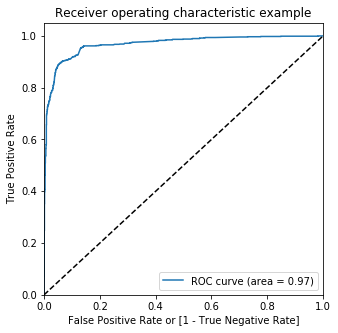

(array([0.        , 0.        , 0.        , ..., 0.99365629, 0.99423299,
        1.        ]),
 array([0.        , 0.00101112, 0.00303337, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99996702e+00, 9.99967022e-01, 9.99931466e-01, ...,
        2.00040966e-04, 1.99415364e-04, 1.92058981e-04]))

In [150]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conversion_Prob)

### Calculating the Area Under the Curve(GINI)

In [151]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [152]:
auc = auc_val(fpr,tpr)
auc

0.9680785060113438

### AUC can be classed as follows:

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail
 
#### Since we got a value of 0.968, our model seems to be doing well on the test dataset

In [153]:
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.108647,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.373637,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.004201,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.777743,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.999272,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [154]:
y_test_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,3271,0.077231,0
1,1,1490,0.996330,1
2,0,7936,0.068460,0
3,1,4216,0.884320,1
4,0,3830,0.078016,0


In [155]:
final_pred_df = y_test_pred_final.append(y_train_pred_final[['Converted','Conversion_Prob','LeadID','final_predicted']])

In [156]:
final_pred_df.shape

(9074, 4)

In [157]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(final_pred_df['LeadID'].unique().tolist())

9074

In [158]:
final_pred_df = final_pred_df[['LeadID','Converted','Conversion_Prob','final_predicted']]

In [159]:
final_pred_df.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3271,0,0.077231,0
1,1490,1,0.996330,1
2,7936,0,0.068460,0
3,4216,1,0.884320,1
4,3830,0,0.078016,0


In [160]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
final_pred_df['Lead_Score'] = final_pred_df['Conversion_Prob'].apply(lambda x : round(x*100))
final_pred_df.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,3271,0,0.077231,0,8
1,1490,1,0.996330,1,100
2,7936,0,0.068460,0,7
3,4216,1,0.884320,1,88
4,3830,0,0.078016,0,8


In [161]:
# Inspecing the max LeadID
final_pred_df.LeadID.max()

9239

In [162]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
final_pred_df = final_pred_df.set_index('LeadID').sort_index(axis = 0, ascending = True)
final_pred_df.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.004998,0,0
1,0,0.010457,0,1
2,1,0.976375,1,98
3,0,0.001104,0,0
4,1,0.966741,1,97


In [163]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads_df[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [164]:
original_leads.index.max()

9239

In [165]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, final_pred_df], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.004998,0,0
1,660728,0,0.010457,0,1
2,660727,1,0.976375,1,98
3,660719,0,0.001104,0,0
4,660681,1,0.966741,1,97
5,660680,0,0.012052,0,1
6,660673,1,0.975913,1,98
7,660664,0,0.012052,0,1
8,660624,0,0.068160,0,7
9,660616,0,0.066878,0,7


In [166]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
final_predicted,0,0.0
Conversion_Prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


# Feature Importance
#### Selecting the coefficients of the selected features excluding the constant

In [167]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             3.49
Lead Source_Welingak Website                            4.25
Last Activity_SMS Sent                                  1.82
Last Notable Activity_Modified                         -1.68
What is your current occupation_Unemployed              1.49
What is your current occupation_Working Professional    1.91
Tags_Already a student                                 -4.15
Tags_Closed by Horizzon                                 6.44
Tags_Diploma holder (Not Eligible)                     -3.59
Tags_Interested  in full time MBA                      -2.66
Tags_Interested in other courses                       -2.38
Tags_Lost to EINS                                       5.84
Tags_Not doing further education                       -3.62
Tags_Ringing                                           -4.37
Tags_Will revert after reading the email                4.05
Tags_opp hangup                                        -2.56
Tags_switched off       

In [168]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                             54.14
Lead Source_Welingak Website                            65.93
Last Activity_SMS Sent                                  28.22
Last Notable Activity_Modified                         -26.08
What is your current occupation_Unemployed              23.15
What is your current occupation_Working Professional    29.69
Tags_Already a student                                 -64.45
Tags_Closed by Horizzon                                100.00
Tags_Diploma holder (Not Eligible)                     -55.71
Tags_Interested  in full time MBA                      -41.24
Tags_Interested in other courses                       -36.93
Tags_Lost to EINS                                       90.71
Tags_Not doing further education                       -56.24
Tags_Ringing                                           -67.85
Tags_Will revert after reading the email                62.86
Tags_opp hangup                                        -39.78
Tags_swi

In [169]:
#### Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance)
sorted_idx
##

Total Time Spent on Website                             13
Lead Source_Welingak Website                            16
Last Activity_SMS Sent                                   6
Last Notable Activity_Modified                          12
What is your current occupation_Unemployed               8
What is your current occupation_Working Professional     9
Tags_Already a student                                  15
Tags_Closed by Horizzon                                 10
Tags_Diploma holder (Not Eligible)                       3
Tags_Interested  in full time MBA                        4
Tags_Interested in other courses                         2
Tags_Lost to EINS                                        5
Tags_Not doing further education                         0
Tags_Ringing                                            14
Tags_Will revert after reading the email                 1
Tags_opp hangup                                         11
Tags_switched off                                       

#### Let's now plot all the feature variables based on their relative coefficient values

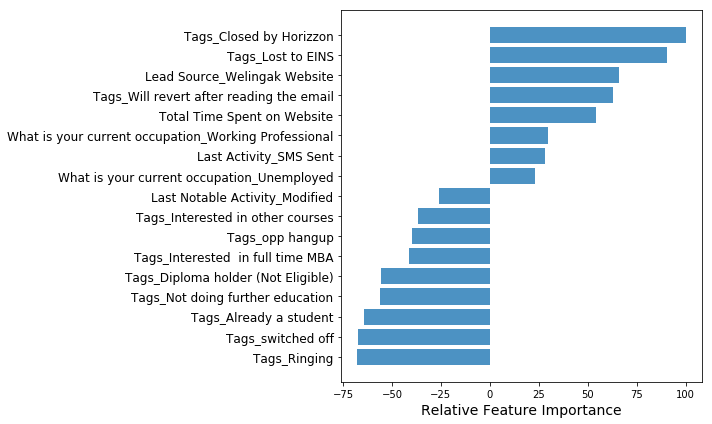

In [170]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[_cols].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### `Top 5` features which contribute most towards the probability of a lead getting converted

In [171]:
pd.DataFrame(feature_importance).reset_index()
feature_importance.sort_values(ascending=False,inplace=True)
feature_importance.head()

Tags_Closed by Horizzon                    100.00
Tags_Lost to EINS                           90.71
Lead Source_Welingak Website                65.93
Tags_Will revert after reading the email    62.86
Total Time Spent on Website                 54.14
dtype: float64

### `Top 5` features which contribute most towards the probability of a lead *NOT* getting converted

In [172]:
feature_importance.tail()

Tags_Diploma holder (Not Eligible)   -55.71
Tags_Not doing further education     -56.24
Tags_Already a student               -64.45
Tags_switched off                    -67.27
Tags_Ringing                         -67.85
dtype: float64